In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import io
import matplotlib.pyplot as plt
 
from google.colab import files
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
 
%matplotlib inline

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U -q PyDrive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fid = drive.ListFile({'q':"title='COVID-19.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('COVID-19.zip')

In [0]:
local_zip = '/content/COVID-19.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
train_normal_dir = os.path.join('/tmp/covid19/train/normal')
train_pneumonia_dir = os.path.join('/tmp/covid19/train/pneumonia')
validation_normal_dir = os.path.join('/tmp/covid19/validation/normal')
validation_pneumonia_dir = os.path.join('/tmp/covid19/validation/pneumonia')

print(len(os.listdir('/tmp/covid19/train/normal')))
print(len(os.listdir('/tmp/covid19/train/pneumonia')))
print(len(os.listdir('/tmp/covid19/validation/normal')))
print(len(os.listdir('/tmp/covid19/validation/pneumonia')))

74
74
20
20


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [13]:
training_dir = "/tmp/covid19/train/"
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(training_dir, batch_size=5, class_mode='binary', target_size=(150, 150), classes= ['normal', 'pneumonia'])

validation_dir = "/tmp/covid19/validation/"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=5, class_mode='binary',target_size=(150, 150), classes= ['normal', 'pneumonia'])


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator, epochs=30, verbose=1, validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
30/30 [==============================] - 5s 183ms/step - loss: 1.3211 - acc: 0.6149 - val_loss: 0.3566 - val_acc: 0.9750
Epoch 2/30
30/30 [==============================] - 5s 175ms/step - loss: 0.9341 - acc: 0.8108 - val_loss: 0.1783 - val_acc: 0.9250
Epoch 3/30
30/30 [==============================] - 5s 180ms/step - loss: 0.8570 - acc: 0.8581 - val_loss: 0.0986 - val_acc: 1.0000
Epoch 4/30
30/30 [==============================] - 5s 181ms/step - loss: 0.1794 - acc: 0.9257 - val_loss: 0.0185 - val_acc: 1.0000
Epoch 5/30
30/30 [==============================] - 5s 175ms/step - loss: 0.1865 - acc: 0.9122 - val_loss: 0.0353 - val_acc: 1.0000
Epoch 6/30
30/30 [==============================] - 5s 178ms/step - loss: 0.2648 - acc: 0.9189 - val_loss: 0.0156 - val_acc: 1.0000
Epoch 7/30
30/30 [==============================] - 5s 176ms/step - loss: 1.6567 - acc: 0.9527 - val_loss: 0.0043 - val_acc: 1.0000


Text(0.5, 1.0, 'Training and validation loss')

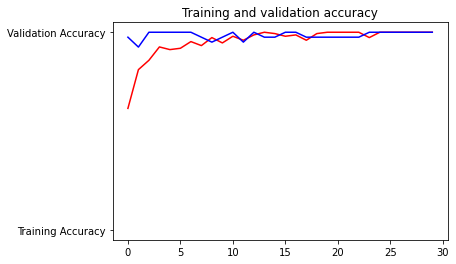

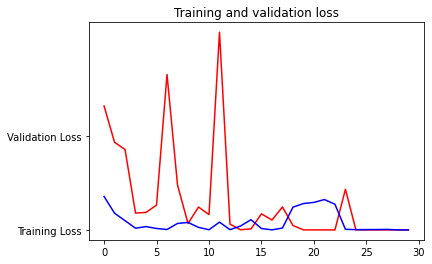

In [15]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [16]:
train_normal_fnames = os.listdir('/tmp/covid19/train/normal')
train_pneumonia_fnames = os.listdir('/tmp/covid19/train/pneumonia')

print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])

['IM-0013-0001.jpeg', 'IM-0035-0001.jpeg', 'NORMAL2-IM-0028-0001.jpeg', 'IM-0083-0001.jpeg', 'IM-0009-0001.jpeg', 'IM-0043-0001.jpeg', 'IM-0025-0001.jpeg', 'IM-0084-0001.jpeg', 'IM-0111-0001.jpeg', 'IM-0017-0001.jpeg']
['80446565-E090-4187-A031-9D3CEAA586C8.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', 'ARDSSevere.png', 'nejmoa2001191_f5-PA.jpeg', 'jkms-35-e79-g001-l-b.jpg', 'covid-19-pneumonia-12.jpg', '5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', 'F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg', '7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg']


In [0]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [18]:
training_dir = "/tmp/covid19/train/"
train_datagen = ImageDataGenerator(
      rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(training_dir, batch_size=5, class_mode='binary', target_size=(150, 150), classes= ['normal', 'pneumonia'])

validation_dir = "/tmp/covid19/validation/"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=5, class_mode='binary',target_size=(150, 150), classes= ['normal', 'pneumonia'])

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
history_1 = model_1.fit_generator(train_generator, epochs=30, verbose=1, validation_data=validation_generator)

Epoch 1/30
30/30 [==============================] - 5s 178ms/step - loss: 1.0305 - acc: 0.6014 - val_loss: 0.6675 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 5s 176ms/step - loss: 0.5465 - acc: 0.6824 - val_loss: 0.1034 - val_acc: 1.0000
Epoch 3/30
30/30 [==============================] - 5s 176ms/step - loss: 0.3100 - acc: 0.8986 - val_loss: 0.1557 - val_acc: 0.9750
Epoch 4/30
30/30 [==============================] - 5s 174ms/step - loss: 0.2680 - acc: 0.9122 - val_loss: 0.0413 - val_acc: 1.0000
Epoch 5/30
30/30 [==============================] - 5s 169ms/step - loss: 0.3998 - acc: 0.8919 - val_loss: 0.1774 - val_acc: 0.9750
Epoch 6/30
30/30 [==============================] - 5s 175ms/step - loss: 0.1217 - acc: 0.9595 - val_loss: 0.0428 - val_acc: 0.9750
Epoch 7/30
30/30 [==============================] - 5s 177ms/step - loss: 0.1149 - acc: 0.9595 - val_loss: 0.1122 - val_acc: 0.9750
Epoch 8/30
30/30 [==============================] - 5s 178ms/step - loss: 0.

Text(0.5, 1.0, 'Training and validation loss')

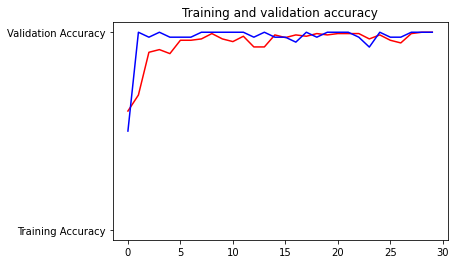

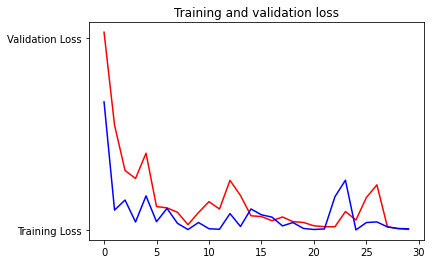

In [20]:
acc=history_1.history['acc']
val_acc=history_1.history['val_acc']
loss=history_1.history['loss']
val_loss=history_1.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')